In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq
import matplotlib.pyplot as plt
import numpy as np
from cirq.ops import *

installing cirq...
     |████████████████████████████████| 541 kB 6.5 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 1.8 MB 31.6 MB/s 
     |████████████████████████████████| 593 kB 56.5 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 10.1 MB 48.7 MB/s 
     |████████████████████████████████| 145 kB 53.6 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 97 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 220 kB 7.0 MB/s 
     |████████████████████████████████| 43 kB 942 kB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 229 kB 73.8 MB/s 
     |████████████████████████████████| 243 kB 45.6 MB/s 
     |██████

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: cirq.ops.moment was used but is deprecated.
 it will be removed in cirq v0.16.
 Use cirq.circuits.moment instead.

  # Remove the CWD from sys.path while we load stuff.


# Task I: Quantum Computing Part

## 1) Implement a simple quantum operation with Cirq

In [26]:
# 1)
# a) With 5 qubits
qubits = cirq.LineQubit.range(5)
circuit = cirq.Circuit()

# b) Apply Hadamard operation on every qubit
for i in range(5):
    circuit.append(H(qubits[i]))

# c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
for i in range(4):
    circuit.append(CNOT(qubits[i], qubits[i+1]))

# d) SWAP (0, 4)
circuit.append(SWAP(qubits[0], qubits[4]))

# e) Rotate X with pi/2 on any qubit
circuit.append(rx(np.pi/2).on(qubits[0]))

# f) Plot the circuit
print(circuit)

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


## 2). Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state

myqubit: ───Rx(0.4π)───Rx(1.6π)───Rx(0.5π)───Rx(0)───Rx(0.6π)───Rx(0.7π)───M('r')───

The probability of measuring state |0⟩ is 0.85 



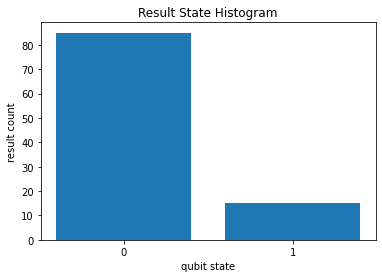

In [27]:
# 2) 
qubit = cirq.NamedQubit("myqubit")
circuit_2 = cirq.Circuit()

for i in range(6):
    rand = 0.1*np.random.randint(0, 20)
    circuit_2.append(rx(rand*np.pi).on(qubit))

# measure the qubit
circuit_2.append(cirq.measure(qubit, key='r'))

# plot circuit and resutl
print(circuit_2)

# run simulation
result = cirq.Simulator().run(circuit_2, repetitions=100)
_ = cirq.vis.plot_state_histogram(result, plt.subplot())
print("\nThe probability of measuring state |0⟩ is", result.histogram(key="r")[0]/100, "\n")